NAME: BALANITHISH.G

PROJECT: SPAM SMS DETECTION



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords #for cleaning
from nltk.stem import LancasterStemmer ##for cleaning
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [2]:
#The usecols parameter helps in efficiently loading only the specified columns, saving memory and speeding up the data loading process
df = pd.read_csv("spam.csv", encoding="latin-1", usecols= ["v1", "v2"])
df.columns=["label", "Message"]

In [3]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
# Install the NLTK package
!pip install nltk

# Download the punkt package
nltk.download('punkt')

# Re-run the code that failed
df["CleanMessage"] = df["Message"].apply(cleaning_data)
stop_words = set(nltk.corpus.stopwords.words('english'))
stemmer = LancasterStemmer()

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["CleanMessage"] = df["Message"].apply(cleaning_data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
# TfidfVectorizer for "CleanMessage" column
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["CleanMessage"])

# OneHotEncoder for "kind" column
encoder = OneHotEncoder(sparse=False, drop='first')
Y = encoder.fit_transform(df[["label"]])
X_combined = np.hstack((X.toarray(), Y))

print(X_combined)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


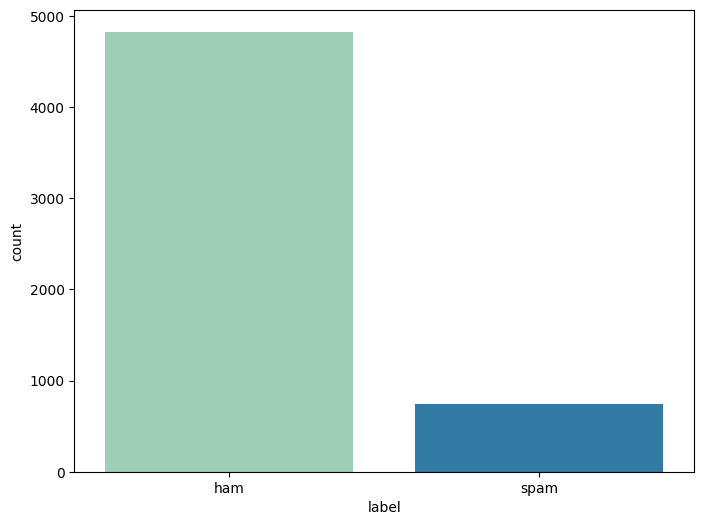

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x="label", data=df, palette="YlGnBu")
plt.show()


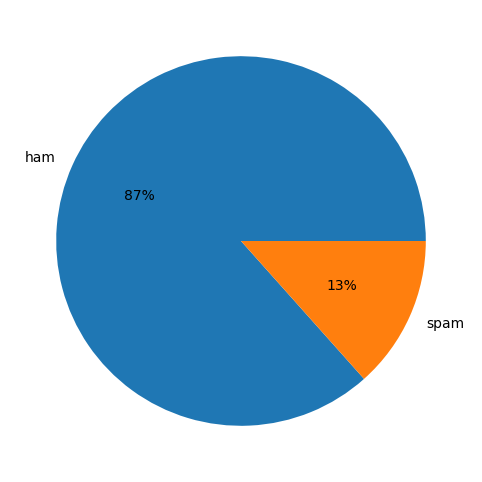

In [12]:
plt.figure(figsize=(8, 6))
kind_counts = df["label"].value_counts()
plt.pie(kind_counts, labels=kind_counts.index, autopct="%0.0f%%")
plt.show()

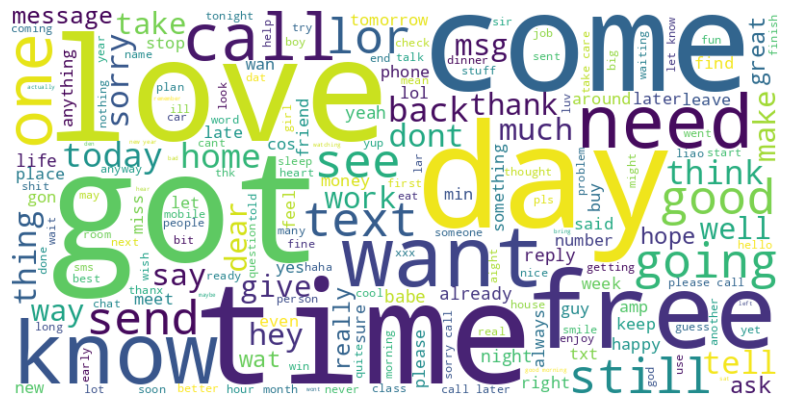

In [13]:
text_column = df["CleanMessage"]

text = ' '.join(text_column.dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [15]:
model.score(X_train,Y_train)
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [16]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9614349775784753
